# SVM Text Classifier
This module uses support vector machines (SVM) to create a model for predicting risk level as a function of text data

To get started, we import the `svm_text_classifier` along with some standard numerical packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from svm_text_classifier import SVM_text_class

First, we load a set of sample data that contains text entries and corresponding risk levels:

In [2]:
df = pd.read_csv('./data/test_data.csv', index_col=0)

Inspecting to see what we have:

In [3]:
print('Number of entries:', len(df))
print(df.head())

Number of entries: 150
      Risk_level                                           Synopsis
2510           2  B757-200 NOSEWHEEL STEERING FAILS ON ENTRY TO ...
1189           4  C172 instructor pilot reported detecting exhau...
336            1  AN ACR PLT RPTS THAT MIA TERMINAL 'A' GATE '10...
2348           5  During an installation of a B777-200 Nose Land...
772            3  An air crew on a departure were cleared to 6;0...


Let's randomly split up the data set into training and test portions:

In [4]:
np.random.seed(1)
train_idx = np.random.choice(len(df), size=100, replace=False)
train_flags = np.repeat(False, len(df))
train_flags[train_idx] = True
test_flags = ~train_flags
df_train = df[train_flags]
df_test = df[test_flags]

Now let's create an SVM classifier using the training set:

In [5]:
classifier = SVM_text_class(df.loc[train_flags,'Synopsis'], df.loc[train_flags,'Risk_level'])

We use the classifier to predict the risk level in the cases that were not used in model training:

In [6]:
predictions = classifier.pred(df_test['Synopsis'])

Let's take a look at how some of the individual predictions compare to the actual risk levels:

In [7]:
for i in range(10):
    row = df_test.iloc[i]
    print('Synopsis:', row['Synopsis'][:50])
    print('    Actual Risk = {}, Predicted Risk = {}'.format(row['Risk_level'], predictions[i]))

Synopsis: B757-200 NOSEWHEEL STEERING FAILS ON ENTRY TO RWY.
    Actual Risk = 2, Predicted Risk = 3
Synopsis: C172 instructor pilot reported detecting exhaust f
    Actual Risk = 4, Predicted Risk = 3
Synopsis: During an installation of a B777-200 Nose Landing 
    Actual Risk = 5, Predicted Risk = 2
Synopsis: PA28 pilot reports entering a spin during a visual
    Actual Risk = 4, Predicted Risk = 5
Synopsis: A helicopter pilot took off and crossed an active 
    Actual Risk = 4, Predicted Risk = 1
Synopsis: EMB170 Captain arriving ORD from the south describ
    Actual Risk = 4, Predicted Risk = 1
Synopsis: EMB145 First Officer describes a ground conflict t
    Actual Risk = 3, Predicted Risk = 5
Synopsis: MD-83 Captain reported 'R OIL STRAINER CLOG' light
    Actual Risk = 2, Predicted Risk = 1
Synopsis: A B737-300 CAPT REPORTS AN ACR DE-ICE CREW'S FAILU
    Actual Risk = 2, Predicted Risk = 2
Synopsis: A CRJ200's engine displayed high ITT and after an 
    Actual Risk = 5, Predicted

We can also create a cross-validation plot that compares the actual risk levels to the known risk levels within the test set (we apply a small amount of random "jitter" in the plotted values to mitigate the effect of multiple data points plotting on top of each other):

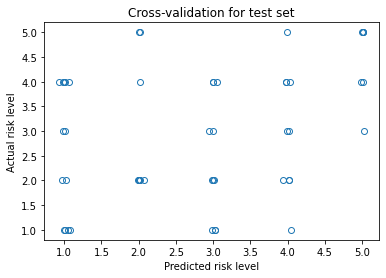

In [8]:
f, ax = plt.subplots()
ax.plot(predictions+np.random.normal(0,0.03,size=len(predictions)), df_test['Risk_level'], 'o', mfc='none')
ax.set_xlabel('Predicted risk level')
ax.set_ylabel('Actual risk level')
ax.set_title('Cross-validation for test set');

We can create a similar plot using the data from the training set:

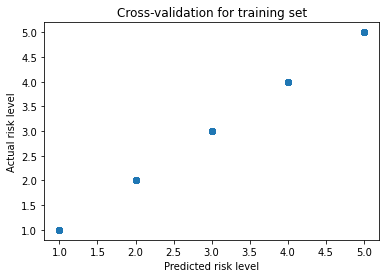

In [9]:
df_train = df.loc[train_flags]
f, ax = plt.subplots()
ax.plot(classifier.pred(df_train['Synopsis']), df_train['Risk_level'], 'o')
ax.set_xlabel('Predicted risk level')
ax.set_ylabel('Actual risk level')
ax.set_title('Cross-validation for training set');

The cross-validation for the training set is not too interesting, because the model correctly predicts the risk level associated with each of the training cases.